# Imports

In [1]:
sys.path.append('/home/spike/') #path to the ecogy package

In [2]:
from ecogy.io import LinearProbe, FilmProbe, Reader
from ecogy.io import get_time_slice, get_raw, get_events
from ecogy.io import remove_artifact
import copy

# Preprocess data

## Probe

In [3]:
ls /home/spike/ecogy/probes

A1x16_100um.csv  XA60_FILM_IB1_IB2.csv  XA60_FILM_IB2_IB3.csv
A1x16_50um.csv   XA60_FILM_IB1_IB3.csv


<IPython.core.display.Javascript object>


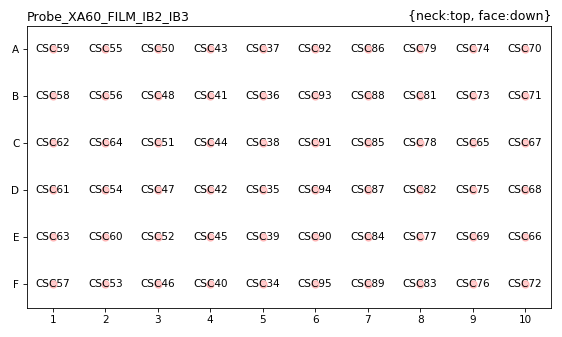

In [4]:
df = pd.read_csv('/home/spike/ecogy/probes/XA60_FILM_IB2_IB3.csv', index_col=0)
fp = FilmProbe(df)
fp.show()

<IPython.core.display.Javascript object>


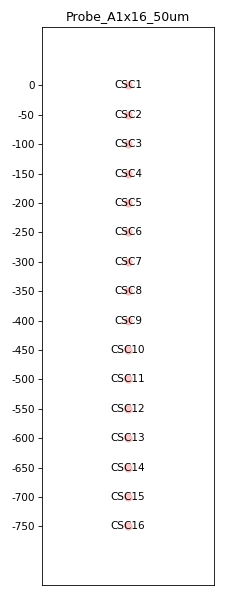

In [5]:
df = pd.read_csv('/home/spike/ecogy/probes/A1x16_50um.csv', index_col=0)
p = LinearProbe(df)
p.show()

## Data

### Path

In [ ]:
rec = '2019-07-27_00-32-17'
exp = rec[:10]
year = rec[:4]
# exp = '2019-10-14'

In [ ]:
# os.listdir()

In [ ]:
path = f'/home/spike/mounts/R_KHZPV_7322/CheetahData3/Roman/{year}/{exp}/{rec}/'
assert path[-1] == '/'
path

In [ ]:
os.listdir('/home/spike/mounts/R_KHZPV_7322/CheetahData3/Roman/2019-10-17')

In [7]:
path = '/home/spike/mounts/R_KHZPV_7322/CheetahData3/Roman/2019-10-17/2019-10-17_22-19-20/'

### Reader

In [8]:
reader = Reader(path)
reader.info()

Total number of channels       : 84
    Number of CSC channels     : 80
    Number of PZO channels     : 4


Sampling frequency             : 32000 Hz

Block 0 has:                  
    Segment 0 of length        : 200.912 s ( 3.3485333333333336 )min


In [41]:
reader.df_ch

,type,name,id,sampling_rate,dtype,units,gain,offset,group_id
0,CSC,CSC1,8,32000.0,int16,uV,0.106812,0.0,0
1,CSC,CSC10,1,32000.0,int16,uV,0.106812,0.0,0
2,CSC,CSC11,15,32000.0,int16,uV,0.106812,0.0,0
3,CSC,CSC12,0,32000.0,int16,uV,0.106812,0.0,0
4,CSC,CSC13,13,32000.0,int16,uV,0.106812,0.0,0
...,...,...,...,...,...,...,...,...,...
79,CSC,CSC96,95,32000.0,int16,uV,0.106812,0.0,0
80,PZO,PZO33,96,32000.0,int16,uV,3.997803,0.0,0
81,PZO,PZO34,97,32000.0,int16,uV,3.997803,0.0,0
82,PZO,PZO35,98,32000.0,int16,uV,3.997803,0.0,0


### Parameters

In [11]:
block_index, seg_index = 0, 0

t_start , t_stop = None, None

t_start, t_stop = get_time_slice(reader, t_start, t_stop, block_index, seg_index)

Starts at                      : 1.599999814061448e-05 s
Stops at                       : 200.91193600000042 s


### Raw

In [12]:
raw = get_raw(reader,
              selected_channels = p.channels, 
              block_index=block_index, 
              seg_index=seg_index, 
              t_start=t_start, 
              t_stop=t_stop)

time = np.linspace(t_start, 
                   raw.get_data().shape[1]/raw.info['sfreq'] + t_stop, 
                   raw.get_data().shape[1])

print(f'Raw signal has shape {raw.get_data().shape}')

Raw signal has shape (16, 6429181)


<IPython.core.display.Javascript object>


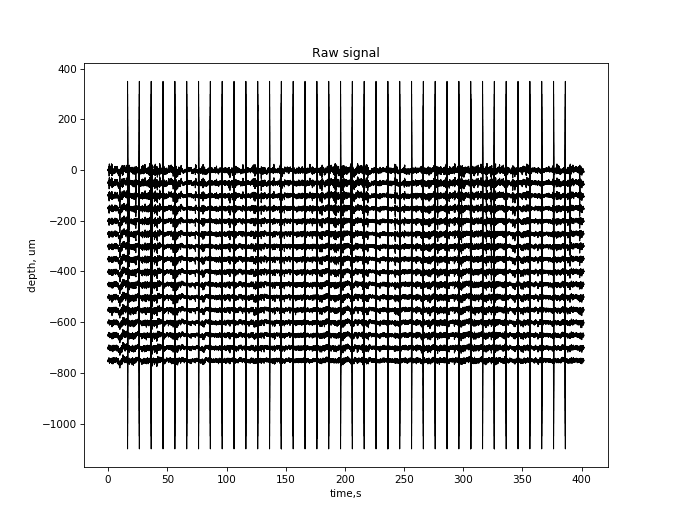

Text(0, 0.5, 'depth, um')

In [13]:
plt.figure(figsize=[9,7])

plt.plot(time, raw.get_data().T/10 + p.y, 'k', lw=1);
plt.title('Raw signal')
plt.xlabel('time,s')
plt.ylabel('depth, um')

### LFP

In [ ]:
lfp = raw.copy().filter(0,1000).resample(1000)

time_lfp = np.linspace(t_start, 
                   lfp.get_data().shape[1]/lfp.info['sfreq'] + t_stop, 
                   lfp.get_data().shape[1])

In [ ]:
plt.figure(figsize=[9,7])

plt.plot(time_lfp, lfp.get_data().T/10 + p.y, 'k', lw=1);
plt.title('LFP component')
plt.xlabel('time,s')
plt.ylabel('depth, um')

## Events

### Electric

In [30]:
df_ev = get_events(reader, 
                   block_index=block_index, 
                   seg_index=seg_index, 
                   t_start=t_start, 
                   t_stop=t_stop)

Events event_id=11 ttl=0 38
Events event_id=11 ttl=2 38
Events event_id=19 ttl=0 0


In [31]:
df_ev = df_ev[df_ev['ttl']!=0]
df_ev.reset_index(drop=True, inplace=True)

In [33]:
ts = df_ev['ts'].to_numpy()

In [34]:
events = np.array((ts, np.zeros_like(ts), np.zeros_like(ts))).T.astype(int)
events

array([[ 262012,       0,       0],
       [ 421983,       0,       0],
       [ 581955,       0,       0],
       [ 741927,       0,       0],
       [ 901899,       0,       0],
       [1061871,       0,       0],
       [1221843,       0,       0],
       [1381814,       0,       0],
       [1541786,       0,       0],
       [1701758,       0,       0],
       [1861730,       0,       0],
       [2021702,       0,       0],
       [2181674,       0,       0],
       [2341647,       0,       0],
       [2501619,       0,       0],
       [2661591,       0,       0],
       [2821563,       0,       0],
       [2981535,       0,       0],
       [3141507,       0,       0],
       [3301480,       0,       0],
       [3461452,       0,       0],
       [3621424,       0,       0],
       [3781395,       0,       0],
       [3941368,       0,       0],
       [4101340,       0,       0],
       [4261312,       0,       0],
       [4421284,       0,       0],
       [4581257,       0,   

### PZO

## Epochs

In [74]:
def get_epochs(reader, 
               selected_channels, 
               block_index=0, seg_index=0,
               tmin=-0.2, tmax=0.5):
    
    """
    Uploades slices of raw data and converts them to epochs one by one,
    instead of processing the whole raw data array: `epochs = mne.Epochs(raw,...`
    """
    
    #1. make a copy of the reader and select channels for a given probe
    _reader = copy.deepcopy(reader)
    _reader.select_channels(selected_channels)
    
    
    sfreq = reader.get_sfreq()
    tmax -= 1/sfreq
    
    epochs_list = []
    for i, ev in tqdm(enumerate(events)):
        
        #expands time slice to 0.1 s from both sides to prevent boundary artifacts
        t_start,t_stop = [ev[0]/sfreq + tmin - 0.1, ev[0]/sfreq + tmax + 0.1] 
        
        _raw = get_raw(reader,
                       selected_channels, 
                       block_index, seg_index,
                       t_start, t_stop)
        
        epoch = mne.Epochs(_raw, 
                           np.array([np.abs(tmin-0.1)*sfreq,0,0]).astype('int').reshape(1,-1), 
                           tmin=tmin, 
                           tmax=tmax,
                           preload=True)
        
        epochs_list.append(epoch)
        
    epochs = mne.concatenate_epochs(epochs_list)
    
    return epochs

In [73]:
fepochs = get_epochs(reader, 
                    fp.channels,
                    block_index=0, seg_index=0,
                    tmin=-0.2, tmax=0.5)

38it [00:07,  4.95it/s]


In [35]:
# epochs = mne.Epochs(raw,
#                     events,
#                     preload=True,
#                     tmin = -0.5,
#                     tmax = 1.0 - 1/raw.info['sfreq']) 
# epochs.get_data().shape

(38, 16, 48000)

<IPython.core.display.Javascript object>


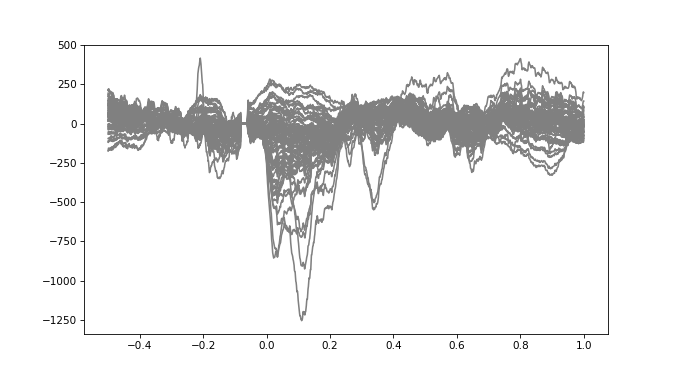

In [83]:
plt.figure(figsize=[9,5])
ttt = np.linspace(-0.5, 1, fepochs.get_data().shape[2])
plt.plot(ttt, fepochs.get_data()[3,:,:].T, 'gray');

In [79]:
fepochs.filter(0,2000).resample(2000)

<Epochs  |   38 events (all good), -0.2 - 0.4995 sec, baseline [None, 0], ~24.5 MB, data loaded,
 '0': 38>

In [81]:
remove_artifact(fepochs, fill_len=0.005, fill_with=0)

In [84]:
fepochs.ch_names

['CSC57',
 'CSC53',
 'CSC46',
 'CSC40',
 'CSC34',
 'CSC95',
 'CSC89',
 'CSC83',
 'CSC76',
 'CSC72',
 'CSC63',
 'CSC60',
 'CSC52',
 'CSC45',
 'CSC39',
 'CSC90',
 'CSC84',
 'CSC77',
 'CSC69',
 'CSC66',
 'CSC61',
 'CSC54',
 'CSC47',
 'CSC42',
 'CSC35',
 'CSC94',
 'CSC87',
 'CSC82',
 'CSC75',
 'CSC68',
 'CSC62',
 'CSC64',
 'CSC51',
 'CSC44',
 'CSC38',
 'CSC91',
 'CSC85',
 'CSC78',
 'CSC65',
 'CSC67',
 'CSC58',
 'CSC56',
 'CSC48',
 'CSC41',
 'CSC36',
 'CSC93',
 'CSC88',
 'CSC81',
 'CSC73',
 'CSC71',
 'CSC59',
 'CSC55',
 'CSC50',
 'CSC43',
 'CSC37',
 'CSC92',
 'CSC86',
 'CSC79',
 'CSC74',
 'CSC70']

In [86]:
fepochs.reorder_channels(fp.channels)
fepochs.ch_names

['CSC57',
 'CSC53',
 'CSC46',
 'CSC40',
 'CSC34',
 'CSC95',
 'CSC89',
 'CSC83',
 'CSC76',
 'CSC72',
 'CSC63',
 'CSC60',
 'CSC52',
 'CSC45',
 'CSC39',
 'CSC90',
 'CSC84',
 'CSC77',
 'CSC69',
 'CSC66',
 'CSC61',
 'CSC54',
 'CSC47',
 'CSC42',
 'CSC35',
 'CSC94',
 'CSC87',
 'CSC82',
 'CSC75',
 'CSC68',
 'CSC62',
 'CSC64',
 'CSC51',
 'CSC44',
 'CSC38',
 'CSC91',
 'CSC85',
 'CSC78',
 'CSC65',
 'CSC67',
 'CSC58',
 'CSC56',
 'CSC48',
 'CSC41',
 'CSC36',
 'CSC93',
 'CSC88',
 'CSC81',
 'CSC73',
 'CSC71',
 'CSC59',
 'CSC55',
 'CSC50',
 'CSC43',
 'CSC37',
 'CSC92',
 'CSC86',
 'CSC79',
 'CSC74',
 'CSC70']

In [ ]:
# dead
# noisy

# Save as .pkl

In [87]:
preprocessed = {
    'linear':{}, 
    'ecog':{}
}

preprocessed['linear']['data'] = epochs
preprocessed['linear']['probe'] = p

preprocessed['ecog']['data'] = fepochs
preprocessed['ecog']['probe'] = fp

preprocessed

{'linear': {'data': <Epochs  |   38 events (all good), -0.5 - 0.9995 sec, baseline [None, 0], ~14.0 MB, data loaded,
   '0': 38>,
  'probe': <ecogy.io.LinearProbe at 0x7f260c1b1c50>},
 'ecog': {'data': <Epochs  |   38 events (all good), -0.2 - 0.4995 sec, baseline [None, 0], ~24.5 MB, data loaded,
   '0': 38>,
  'probe': <ecogy.io.FilmProbe at 0x7f25bc735fd0>}}

In [92]:
filename = f'/home/spike/ecogy/epochs/{path[-20:-1]}_{input("age: ")}_{input("stim.: ")}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(preprocessed, f)
filename

age: P15
stim.: IC1000


'/home/spike/ecogy/epochs/2019-10-17_22-19-20_P15_IC1000.pkl'